🦜 Uncomment the following code for the [TidyTuesday Bird Bath dataset](https://github.com/rfordatascience/tidytuesday/tree/master/data/2021/2021-08-31).🦉

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df_birdbath = read_csv(
    'https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-08-31/bird_baths.csv?raw=true',
    col_types = cols()
)

df_birdbath

survey_year,urban_rural,bioregions,bird_type,bird_count
<dbl>,<chr>,<chr>,<chr>,<dbl>
2014,Urban,South Eastern Queensland,Bassian Thrush,0
2014,Urban,South Eastern Queensland,Chestnut-breasted Mannikin,0
2014,Urban,South Eastern Queensland,Wild Duck,0
2014,Urban,South Eastern Queensland,Willie Wagtail,0
2014,Urban,South Eastern Queensland,Regent Bowerbird,0
2014,Urban,South Eastern Queensland,Rufous Fantail,0
2014,Urban,South Eastern Queensland,Spiny-cheeked Honeyeater,0
2014,Urban,South Eastern Queensland,Flame Robin,0
2014,Urban,South Eastern Queensland,European Goldfinch,0


Each row represents the number of times a type of bird was observed at a bird bath in the survey year.

We want to just work with the most numerous birds for baths that have been categorized as "Urban" or "Rural."

Find the top fifteen bird types by total `bird_count` after filtering out baths where `urban_rural` category is not provided. Capture this vector with a variable called `top15_bird_types`. 

Hint: remember `pull` and `slice_max` 

In [6]:
top15_bird_types = df_birdbath |>
    filter(!is.na(urban_rural)) |>
    group_by(bird_type) |>
    summarise(total_bird_count = sum(bird_count)) |>
    arrange(desc(total_bird_count)) |>
    slice_max(total_bird_count, n = 15) |>
    pull(bird_type)
top15_bird_types

[1] "Noisy Miner"        "Australian Magpie"  "Rainbow Lorikeet"  
 [4] "Red Wattlebird"     "Superb Fairy-wren"  "Magpie-lark"       
 [7] "Pied Currawong"     "Crimson Rosella"    "Eastern Spinebill" 
[10] "Spotted Dove"       "Lewin's Honeyeater" "Satin Bowerbird"   
[13] "Crested Pigeon"     "Grey Fantail"       "Red-browed Finch"

1. Create a table of just the top birds using the vector of top 15 bird types to filter. Exclude rows with `NA` vlues for `urban_rural`.
1. Group by `bird_type` and `urban_rural` and find the mean `bird_count` for each group.
1. Sort the factor levels for `bird_type` by `bird_count` value at `Rural` baths.
1. Capture the output of these operations under a new variable.

Your final table will have three columns: 1) `bird_type`, 2) `urban_rural` and 3) `mean_bird_count`

In [7]:
df_birdbath2 = df_birdbath |>
    filter(!is.na(urban_rural), bird_type %in% top15_bird_types ) |>
    group_by(bird_type, urban_rural) |>
    summarise(mean_bird_count = mean(bird_count), .groups = 'drop') |>
    arrange(urban_rural, mean_bird_count) |>
    mutate(bird_type = fct_inorder(bird_type) |> fct_rev())

df_birdbath2

bird_type,urban_rural,mean_bird_count
<fct>,<chr>,<dbl>
Spotted Dove,Rural,0.03741497
Crested Pigeon,Rural,0.09523810
Pied Currawong,Rural,0.10884354
Magpie-lark,Rural,0.11224490
Red Wattlebird,Rural,0.11904762
Rainbow Lorikeet,Rural,0.13605442
Satin Bowerbird,Rural,0.14285714
Noisy Miner,Rural,0.20068027
Crimson Rosella,Rural,0.22448980


Make a "Urban"/"Rural" [Cleveland dot chart](https://uc-r.github.io/public/images/visual/cleveland-dotplots/unnamed-chunk-10-1.png) figure with your new table. 

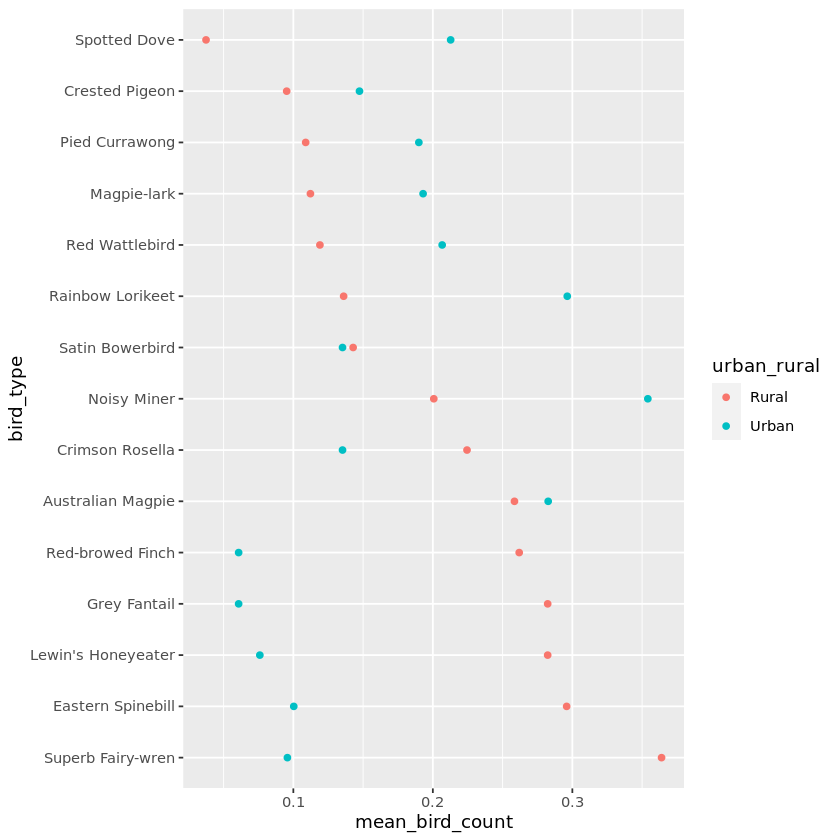

In [8]:
df_birdbath2 |> ggplot(aes(x = mean_bird_count, y = bird_type, color = urban_rural)) +
    geom_point()

If we want to add "segments" to our dot chart, we need to re-shape our data into "wide" format. Specifically we want to have "Urban" and "Rural" as **columns** instead of **values**.

Use `pivot_wider` to make this wide table, capture it, and use `geom_segment` in combination with your wide table to add segments to your Cleveland dot chart from above 👆.

In [9]:
wider_birdbath2 = df_birdbath2 |> pivot_wider(names_from = urban_rural,
                values_from = mean_bird_count)
wider_birdbath2

bird_type,Rural,Urban
<fct>,<dbl>,<dbl>
Spotted Dove,0.03741497,0.21276596
Crested Pigeon,0.09523810,0.14741641
Pied Currawong,0.10884354,0.18996960
Magpie-lark,0.11224490,0.19300912
Red Wattlebird,0.11904762,0.20668693
Rainbow Lorikeet,0.13605442,0.29635258
Satin Bowerbird,0.14285714,0.13525836
Noisy Miner,0.20068027,0.35410334
Crimson Rosella,0.22448980,0.13525836


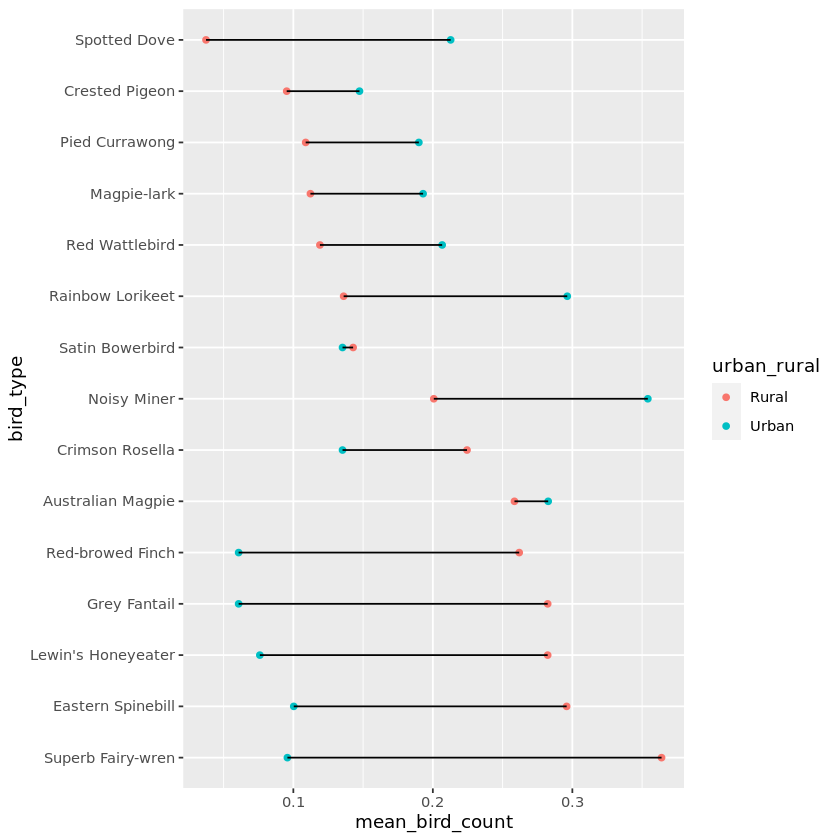

In [108]:
df_birdbath2 |> ggplot(aes(x = mean_bird_count, xend, y = bird_type)) +
    geom_point(aes(color = urban_rural)) +
    geom_segment(wider_birdbath2, mapping = aes(y = bird_type,yend = bird_type, x = Rural, xend = Urban))

(Uncomment the code and make the cell below markdown to see my solution.)

In [10]:
# ![](https://github.com/chuckpr/BIOS512/blob/main/in-class-exercises/12/12_01_pivot_chart.png?raw=true)